In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
movie_data = pd.read_csv('IMBD.csv')

In [4]:
movie_data.isnull().sum()

movie               0
genre               0
runtime         20886
certificate    106041
rating          15510
stars            5215
description         0
votes           15498
director        41280
dtype: int64

In [5]:
movie_data

,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN
...,...,...,...,...,...,...,...,...,...
129886,Chocatos,"Short, Drama, Family",10 min,NaN,NaN,NaN,Add a Plot\n,NaN,['Diego Al Romero']
129887,Song of the Caballero,"Drama, Western",73 min,NaN,NaN,"['Ken Maynard, ', 'Doris Hill, ', 'Francis For...",After El Lobo robs Don Jose he gives one of th...,NaN,['Harry Joe Brown']
129888,The Flaming Forties,Western,60 min,NaN,NaN,"['Harry Carey, ', 'William Bailey, ', 'Jacquel...",A young cowhand befriends a disreputable gambl...,NaN,['Tom Forman']
129889,The Girl and the Sheriff,"Short, Western",NaN,NaN,NaN,"['Betty Keller, ', 'George Field, ', 'Lee Mora...","Bob Warren, sheriff of Grass County, Cal., and...",NaN,['Al Christie']


In [6]:
movie_data = movie_data.drop(['director', 'certificate','runtime', 'description'], axis = 1)

In [7]:
movie_data = movie_data.dropna(subset = ['rating', 'stars'])

In [8]:
movie_data.isnull().sum()

movie     0
genre     0
rating    0
stars     0
votes     0
dtype: int64

In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111724 entries, 0 to 129879
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   movie   111724 non-null  object 
 1   genre   111724 non-null  object 
 2   rating  111724 non-null  float64
 3   stars   111724 non-null  object 
 4   votes   111724 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.1+ MB


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
movie_data['votes'] = movie_data['votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '').astype(float) * 1e6

In [12]:
categorical_columns = movie_data.select_dtypes(include='object').columns

In [13]:
categorical_columns

Index(['movie', 'genre', 'stars'], dtype='object')

In [14]:
movie_df = pd.get_dummies(movie_data[:10000], columns=categorical_columns, drop_first=True)

In [15]:
movie_df

,rating,votes,movie_#adaleTT,movie_'71,movie_'A' gai wak,movie_'A' gai wak 2,movie_'Di puwedeng hindi puwede!,movie_'G' fung bou,movie_'Gator Bait,movie_'Gator Bait 2: Cajun Justice,...,"stars_['Zoë Bell, ', 'Rachel Nichols, ', 'Tracie Thoms, ', 'Bruce Thomas', '']","stars_['Zsolt Trill, ', 'Áron Molnár, ', 'Tamás Szalma, ', 'Gyözö Szabó', '']","stars_['Àlex Monner, ', 'Begoña Vargas, ', 'Abraham Pérez Fernández, ', 'Édgar Vittorino', '']","stars_['Ákos Köszegi, ', 'Zoltán Géczi, ', 'Bence Vaszkó, ', 'Kornél Simon', '']","stars_['Álex Angulo, ', 'Armando De Razza, ', 'Santiago Segura, ', 'Terele Pávez', '']","stars_['Çagatay Ulusoy, ', 'Aras Bulut Iynemli, ', 'Çetin Tekindor, ', 'Nihal G. Koldas', '']","stars_['Çagatay Ulusoy, ', 'Hazar Ergüçlü, ', 'Okan Yalabik, ', 'Burçin Terzioglu', '']","stars_['Çaglar Çorumlu, ', 'Güven Murat Akpinar, ', 'Cagla Irmak, ', 'Sebnem Sönmez', '']","stars_['Ólafur Darri Ólafsson, ', 'Stefán Hallur Stefánsson, ', 'Joi Johannsson, ', 'Thora Bjorg Helga', '']","stars_['Úrsula Corberó, ', 'Álvaro Morte, ', 'Itziar Ituño, ', 'Pedro Alonso', '']"
0,8.1,5.390850e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,1.067590e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.9,4.180800e+10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.2,4.053600e+10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.5,3.203000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,5.1,1.501000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10677,7.3,6.460000e+06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10678,6.5,5.377400e+10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,8.3,2.401000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def predict(X, beta):
    return np.dot(X, beta)
def cost_function(X, y, beta):
    m = len(y)
    predictions = predict(X, beta)
    squared_errors = (predictions - y) ** 2
    return np.sum(squared_errors) / (2 * m)
def gradient_descent(X, y, learning_rate=0.001, num_iterations=1000):
    m, n = len(y), X.shape[1]
    beta = np.random.randn(n)  # Initialize beta with small random values
    for _ in range(num_iterations):
        gradients = np.dot(X.T, np.dot(X, beta) - y) / m
        beta -= learning_rate * gradients
    return beta
def plot_regression_results(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot([min(y_true), max(y_true)], [min(y_pred), max(y_pred)], color='red')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs. Predicted Values")
    plt.show()
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

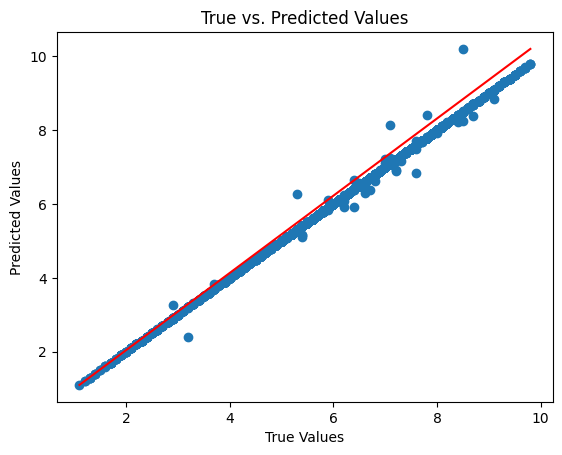

In [18]:
X = movie_df.drop('rating', axis=1).values
y = movie_df['rating'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept to scaled features
X_scaled_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Apply gradient descent with scaled features
beta = gradient_descent(X_scaled_with_intercept, y, learning_rate=0.01, num_iterations=1000)

# Make predictions using scaled features
predictions = predict(X_scaled_with_intercept, beta)

# Plot regression results
plot_regression_results(y, predictions)